In [197]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Hipótese inicial: 

- Ao adentrar o Mercosul como um membro associado, um país apresenta necessariamente um crescimento significativo na questão econômica nos 5 primeiros anos, frente a outros países não membros? 

Mecanismo:

- Um membro associado ao Mercosul, apesar de não participar da TEC (Tarifa Externa Comum), possui uma boa relação com países como Brasil, Argentina e Uruguai, podendo assim, abrir caminho para um aumento das relações comerciais entre os países e assim, havendo um crescimento do PIB.



In [206]:
#Dados de todos os países em relação ao crescimento do PIB anual
dados = pd.read_excel('gdp_per_capita_yearly_growth.xlsx')

In [207]:
#Excluindo os dados denecessários, era necessário ver os valores apenas a partir de 1994
dados_novos = dados.set_index('country')
dados_limpos = dados_novos.iloc[:,195:]


In [200]:
#Próximo passo era selecionar apenas os dados dos países que seriam estudados (Chile, Perú e Colômbia)
dados_escolhidos = dados_limpos.loc[['Brazil','Chile','Belgium','Netherlands']]
dados_escolhidos

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Brazil,1.260,1.89,-1.22,-0.529,3.03,-0.416,1.350,-0.256,4.33,1.59,...,6.60,1.840,0.220,1.370,0.952,1.810,2.190,2.360,2.590,2.790
Chile,5.920,5.18,1.90,-1.980,3.26,2.200,1.060,2.820,5.12,5.26,...,4.75,4.960,4.510,3.310,2.730,3.150,3.440,3.710,3.720,3.720
Belgium,0.923,3.13,1.70,3.230,3.47,0.507,1.310,0.822,2.81,1.51,...,1.60,0.297,-0.984,-0.351,0.955,0.781,0.654,0.723,0.764,0.857
Netherlands,3.360,4.05,3.64,4.350,3.46,1.460,-0.226,0.143,2.17,1.59,...,1.11,0.520,-1.610,-1.050,0.562,1.390,1.530,1.620,1.730,1.840


In [201]:
data_bloco = {'Brazil': ['Mercosul'],'Chile': ['Mercosul'],'Belgium': ['UE'],'Netherlands': ['UE']}
dados_blocos = pd.DataFrame.from_dict(data_bloco, orient='index',columns = ['Blocos'])
dados_blocos

,Blocos
Brazil,Mercosul
Chile,Mercosul
Belgium,UE
Netherlands,UE


In [202]:
dados_escolhidos.join(dados_blocos,how = 'inner')

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Blocos
country,,,,,,,,,,,,,,,,,,,,,
Brazil,1.260,1.89,-1.22,-0.529,3.03,-0.416,1.350,-0.256,4.33,1.59,...,1.840,0.220,1.370,0.952,1.810,2.190,2.360,2.590,2.790,Mercosul
Chile,5.920,5.18,1.90,-1.980,3.26,2.200,1.060,2.820,5.12,5.26,...,4.960,4.510,3.310,2.730,3.150,3.440,3.710,3.720,3.720,Mercosul
Belgium,0.923,3.13,1.70,3.230,3.47,0.507,1.310,0.822,2.81,1.51,...,0.297,-0.984,-0.351,0.955,0.781,0.654,0.723,0.764,0.857,UE
Netherlands,3.360,4.05,3.64,4.350,3.46,1.460,-0.226,0.143,2.17,1.59,...,0.520,-1.610,-1.050,0.562,1.390,1.530,1.620,1.730,1.840,UE


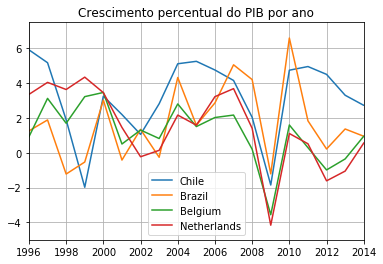

In [203]:
plt.plot(dados_escolhidos.loc['Chile'], label = 'Chile')
plt.plot(dados_escolhidos.loc['Brazil'], label = 'Brazil')
plt.plot(dados_escolhidos.loc['Belgium'], label = 'Belgium')
plt.plot(dados_escolhidos.loc['Netherlands'], label = 'Netherlands')
plt.title('Crescimento percentual do PIB por ano')
plt.legend()
plt.axis([1996, 2014, -5,7.5])
plt.grid()

In [204]:
paises_na_UE=[]
paises_no_mercosul=[]
paises_UE=["France", "Germany", "Belgium", "Italy", "Luxembourg", "Netherlands", "Denmark", "Ireland", "United Kingdom", "Greece", "Portugal", "Spain", "Austria", "Finland", "Sweden", "Hungary", "Cyprus", "Czech Republic", "Estonia", "Latvia", "Lithuania", "Malta", "Poland", "Slovak Republic", "Slovenia", "Bulgaria", "Romania", "Croatia"]
paises_mercosul=['Argentina', 'Brazil', 'Paraguay','Uruguay','Bolivia', 'Chile', 'Colombia', 'Ecuador', 'Peru', 'Guiana', 'Suriname']
for pais in dados['country']:
    if pais in paises_UE:
        paises_na_UE.append('Membro')
        paises_no_mercosul.append('-')
    elif pais in paises_mercosul:
        paises_na_UE.append('-')
        paises_no_mercosul.append('Membro')
    else:
        paises_na_UE.append('-')
        paises_no_mercosul.append('-')
dados_limpos['Mercosul']=paises_no_mercosul
dados_limpos['União Europeia']=paises_na_UE

/Users/varella/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/varella/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [205]:
paises_na_UE=[]
paises_no_mercosul=[]
paises_UE=["France", "Germany", "Belgium", "Italy", "Luxembourg", "Netherlands", "Denmark", "Ireland", "United Kingdom", "Greece", "Portugal", "Spain", "Austria", "Finland", "Sweden", "Hungary", "Cyprus", "Czech Republic", "Estonia", "Latvia", "Lithuania", "Malta", "Poland", "Slovak Republic", "Slovenia", "Bulgaria", "Romania", "Croatia"]
paises_mercosul=['Argentina', 'Brazil', 'Paraguay','Uruguay','Bolivia', 'Chile', 'Colombia', 'Ecuador', 'Peru', 'Guiana', 'Suriname']
for pais in dados_emprego['country']:
    if pais in paises_UE:
        paises_na_UE.append('Membro')
        paises_no_mercosul.append('-')
    elif pais in paises_mercosul:
        paises_na_UE.append('-')
        paises_no_mercosul.append('Membro')
    else:
        paises_na_UE.append('-')
        paises_no_mercosul.append('-')
dados_limpos_emp['Mercosul']=paises_no_mercosul
dados_limpos_emp['União Europeia']=paises_na_UE


NameError: name 'dados_emprego' is not defined

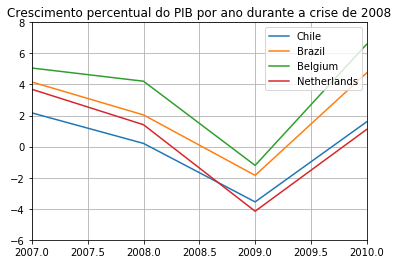

In [208]:
plt.plot(dados_escolhidos.iloc[2,:-2], label = 'Chile')
plt.plot(dados_escolhidos.iloc[1,:-2], label = 'Brazil')
plt.plot(dados_escolhidos.iloc[0,:-2], label = 'Belgium')
plt.plot(dados_escolhidos.iloc[3,:-2], label = 'Netherlands')
plt.title('Crescimento percentual do PIB por ano durante a crise de 2008')
plt.legend(loc = 'upper right')
plt.axis([2007, 2010, -6,8])
plt.grid()

In [209]:
data_média = {'Brazil': [-1.21,6.6],'Chile': [-1.85,4.75],'Belgium': [-3.56,1.6],'Netherlands': [-4.16,1.1]}
dados_média = pd.DataFrame.from_dict(data_média, orient='index',columns = ['2009','2010'])

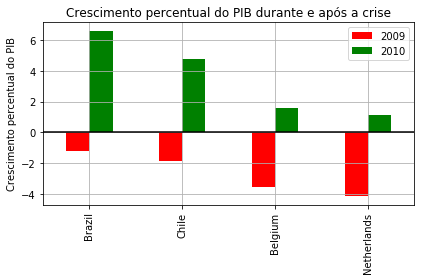

In [210]:
dados_média.plot(kind='bar', color=('red', 'green'))
plt.ylabel('Crescimento percentual do PIB')
plt.title('Crescimento percentual do PIB durante e após a crise')
plt.grid()
plt.tight_layout()
plt.axhline(y=0,color='black')

In [211]:
data_recuperação = {'Brazil': [3.905],'Chile': [3.3],'Belgium': [2.58],'Netherlands': [2.63]}
dados_recuperacao = pd.DataFrame.from_dict(data_recuperação, orient='index', columns = ['"Taxa de recuperação"'])

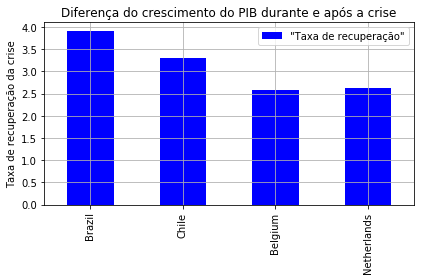

In [212]:
dados_recuperacao.plot(kind='bar', color=('blue'))
plt.ylabel('Taxa de recuperação da crise')
plt.title('Diferença do crescimento do PIB durante e após a crise')
plt.tight_layout()
plt.grid()